In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [3]:
btc_df = pd.read_csv('Gemini_BTCUSD_d.csv',skiprows=1)

In [4]:
btc_df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1694390400000,2023-09-11 00:00:00,BTC/USD,25827.13,25889.64,24915.00,25161.59,432.990593,1.089473e+07
1,1694304000000,2023-09-10 00:00:00,BTC/USD,25898.47,26017.17,25570.00,25827.13,174.044965,4.495082e+06
2,1694217600000,2023-09-09 00:00:00,BTC/USD,25908.81,25931.82,25799.90,25898.47,107.904681,2.794566e+06
3,1694131200000,2023-09-08 00:00:00,BTC/USD,26248.67,26429.88,25647.26,25908.81,320.176927,8.295403e+06
4,1694044800000,2023-09-07 00:00:00,BTC/USD,25752.41,26426.30,25615.96,26248.67,305.336073,8.014666e+06
...,...,...,...,...,...,...,...,...,...
3244,1444622400,2015-10-12 04:00:00,BTC/USD,248.98,248.98,245.75,245.75,71.047743,1.745998e+04
3245,1444536000,2015-10-11 04:00:00,BTC/USD,246.30,249.50,245.96,248.98,22.747091,5.663571e+03
3246,1444449600,2015-10-10 04:00:00,BTC/USD,245.51,246.30,244.60,246.30,30.870549,7.603416e+03
3247,1444363200,2015-10-09 04:00:00,BTC/USD,243.60,249.97,243.60,245.51,61.587068,1.512024e+04


Text(0.5, 1.0, 'BTC Closing Price')

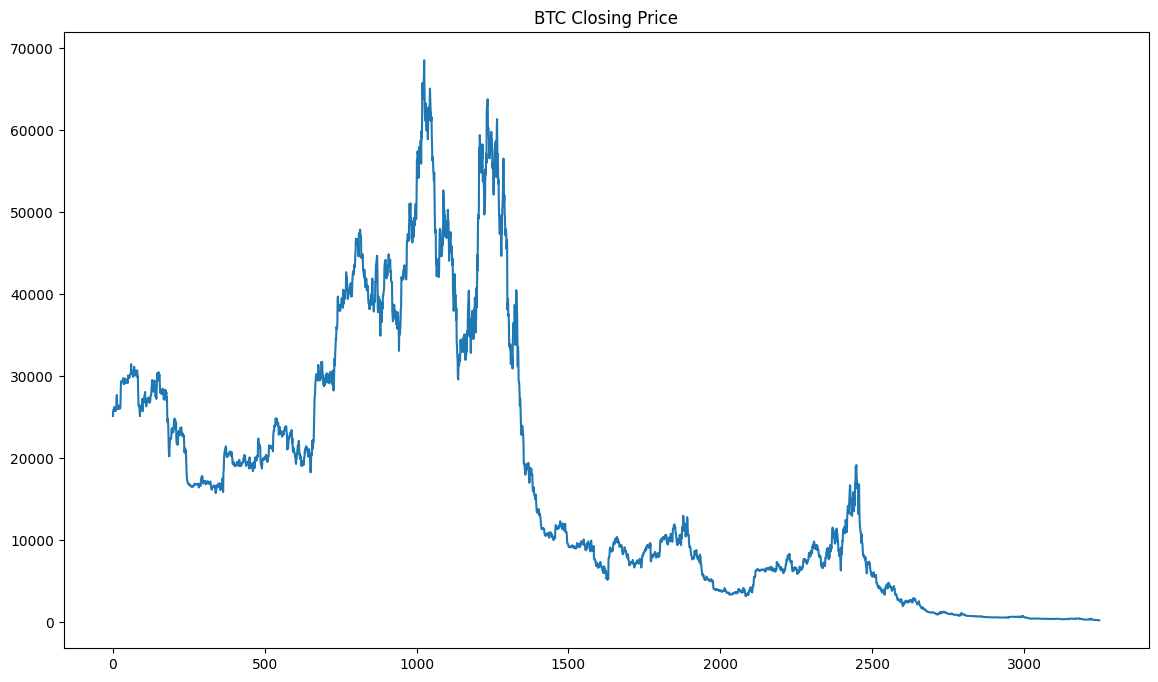

In [5]:
plt.figure(figsize=(14,8))
plt.plot(btc_df['close'])
plt.title('BTC Closing Price')
# plt.savefig(r'plots\btc_lineplot.png')

In [6]:
def removeTrendSeasonality(timeseries,title):
    
    ## Differencing Technique
    if(any(n<=0 for n in timeseries)):
        ts_log = timeseries
        ts_log_diff = timeseries.diff()
        dataTransformFlag=1
    else:
        ts_log = np.log(timeseries)
        ts_log_diff = ts_log - ts_log.shift()

        
        dataTransformFlag=2
        

    # Treating nan values due to shift
    ts_log_diff.dropna(inplace=True)
#     pred_df['log'] = ts_log
#     pred_df['log_diff'] = ts_log_diff
    
    
    
    # Stationarity test

    testStationarity(ts_log_diff,title)
    
    ### Decomposition technique
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ts_log,model='multiplicative',period=288)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(15,10))
    plt.subplot(411)
    plt.subplot(411).set_title(title)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.title(title)
    plt.tight_layout()
    
    return ts_log_diff,dataTransformFlag



In [7]:
def testStationarity(timeseries, title):
    
    # List containing report details    
    stationarity = False
    report_text1 = []
    dataTransformFlag = 0

    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()

    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.clf()
    
    # Printing Title
    print(title)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
        index=['Test Statistic', 'p-value', '#Lags Used',
                                 'Number of Observations Used'])
    Pvalue = dfoutput['p-value']
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    report_text1.append(str(dfoutput))
    
    if(Pvalue>0.05):
        print('P-value>0.05, therefore Series is not stationary',end = '\n')
        print('Data is being transformed to remove trend and seasonality')
        
        modifiedDataseries,dataTransformFlag = removeTrendSeasonality(timeseries,title)
        stationarity = True    
        return modifiedDataseries, dataTransformFlag,stationarity

    else:
        print('P-value<0.05, therefore Series is stationary',end = '\n')          
        return timeseries, dataTransformFlag,stationarity


Bitcoin
Results of Dickey-Fuller Test:
Test Statistic                   -1.557545
p-value                           0.504877
#Lags Used                       29.000000
Number of Observations Used    3219.000000
Critical Value (1%)              -3.432383
Critical Value (5%)              -2.862438
Critical Value (10%)             -2.567248
dtype: float64
P-value>0.05, therefore Series is not stationary
Data is being transformed to remove trend and seasonality
Bitcoin
Results of Dickey-Fuller Test:
Test Statistic                  -21.482785
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    3242.000000
Critical Value (1%)              -3.432369
Critical Value (5%)              -2.862432
Critical Value (10%)             -2.567245
dtype: float64
P-value<0.05, therefore Series is stationary


(1       0.026107
 2       0.002758
 3       0.000399
 4       0.013032
 5      -0.019087
           ...   
 3244   -0.021138
 3245    0.013058
 3246   -0.010822
 3247   -0.003213
 3248   -0.007810
 Name: close, Length: 3248, dtype: float64,
 2,
 True)

<Figure size 640x480 with 0 Axes>

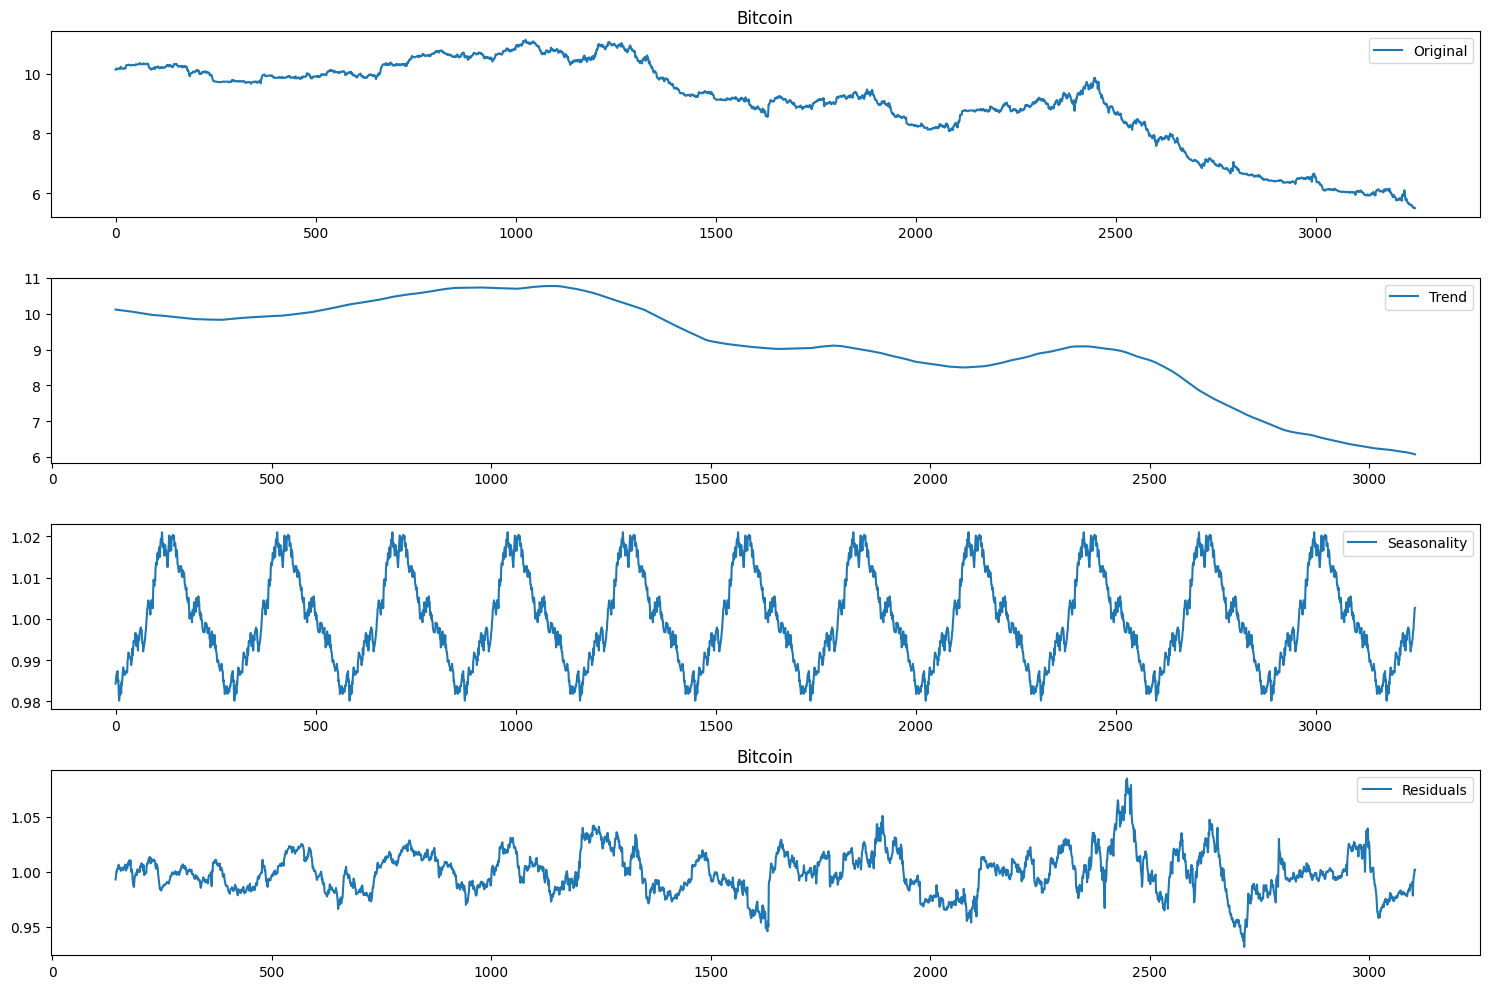

In [8]:
testStationarity(btc_df['close'],'Bitcoin')

In [9]:
def plotAcfPacf(timeseries):

    if(any(n<=0 for n in timeseries)):
        ts_log = timeseries
        ts_log_diff = timeseries.diff()
        dataTransformFlag=1
    else:
        ts_log = np.log(timeseries)
        ts_log_diff = ts_log - ts_log.shift()
        dataTransformFlag=2

    ts_log_diff.dropna(inplace=True)
    lag_acf = acf(ts_log_diff, nlags=20)
    lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

    # Plot ACF
    #Plot ACF: 
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')



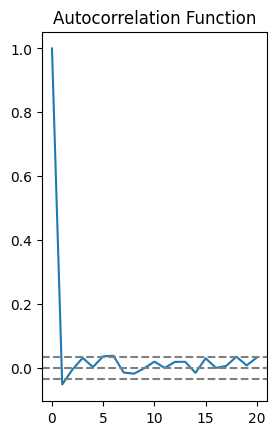

In [10]:
plotAcfPacf(btc_df['close'])

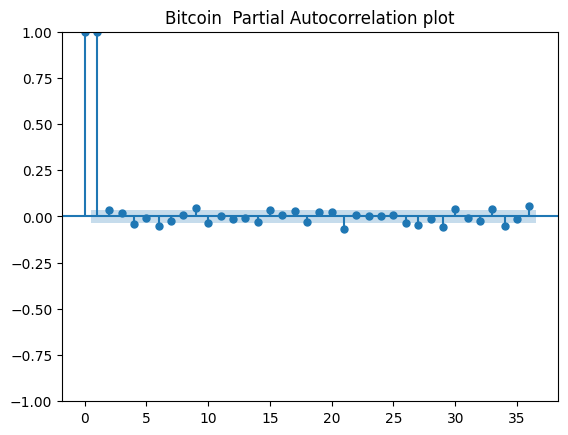

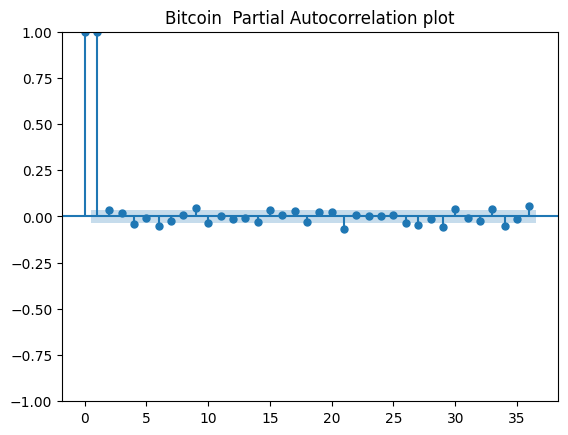

In [11]:
plot_pacf(btc_df['close'],title = 'Bitcoin  Partial Autocorrelation plot')